<a href="https://colab.research.google.com/github/ximedav/Estadistica/blob/main/XimenaDavalos_u1_01_%3C23150275%3E_pdf_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path ="/content/drive/MyDrive/Colab Notebooks/data (1).csv"
df = pd.read_csv(file_path)
df.dropna(inplace=True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [ ]:
# Eliminar registros con valores faltantes
df.dropna(inplace=True)


coeficiente de determinacion:  0.8191

 coeficiente de correlacion 0.905

Coeficiente de determinacion:  0.8191
intervalo de confianza para b1 de  98%
 5.2843 < b1 <  6.2714

             df        sum_sq       mean_sq           F        PR(>F)
Duration    1.0  1.003497e+07  1.003497e+07  756.098109  6.781561e-64
Residual  167.0  2.216431e+06  1.327204e+04         NaN           NaN
Test de Shapiro:  0.0000
valor_p de breusch-pagan:  0.0000


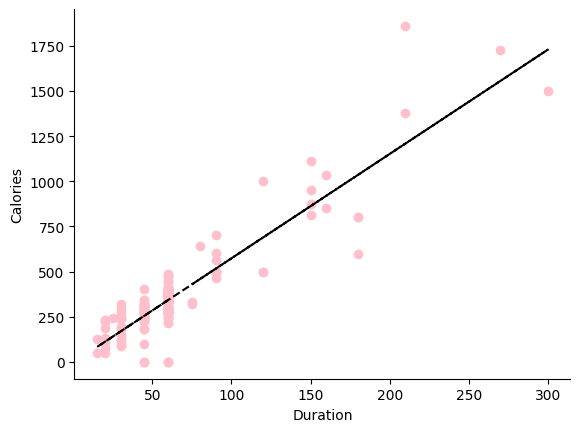

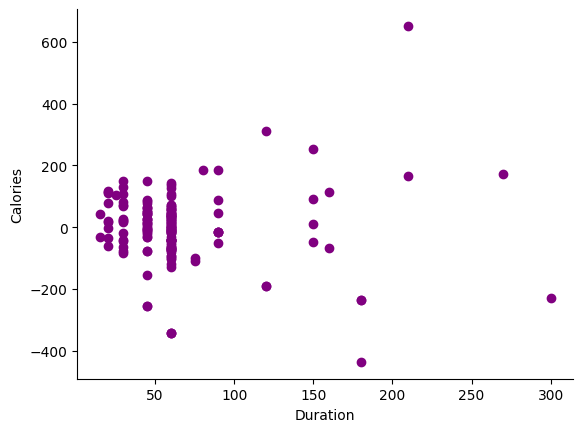

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({
    'Duration': [60,60,60,45,45,60,60,45,30,60,60,60,60,60,60,60,60,45,60,45,60,45,60,45,60,60,60,60,60,60,60,45,60,60,60,60,60,60,60,45,45,60,60,60,60,60,60,45,45,60,60,80,60,60,30,60,60,45,20,45,210,160,160,45,20,180,150,150,20,300,150,60,90,150,45,90,45,45,120,270,30,45,30,120,45,30,45,120,45,20,180,45,30,15,20,20,30,25,30,90,20,90,90,90,30,30,180,30,90,210,60,45,15,45,60,60,60,60,60,60,30,45,60,60,60,60,60,60,90,60,60,60,60,60,60,20,45,45,45,20,60,60,45,45,60,45,60,60,30,60,60,60,60,30,60,60,60,60,60,30,30,45,45,45,60,60,60,75,75],
    'Calories': [409.1, 479, 340, 282.4, 406, 300, 374, 253.3, 195.1, 269, 329.3, 250.7, 345.3, 379.3, 275, 215.2, 300, 0, 323, 243, 364.2, 282, 300, 246, 334.5, 250, 241, 0, 280, 380.3, 243, 180.1, 299, 223, 361, 415, 300, 300, 300, 266, 180.1, 286, 329.4, 400, 397, 273, 387.6, 300, 298, 397.6, 380.2, 643.1, 263, 486, 238, 450.7, 413, 305, 226.4, 321, 1376, 1034.4, 853, 341, 131.4, 800.4, 873.4, 816, 110.4, 1500.2, 1115, 387.6, 700, 953.2, 304, 563.2, 251, 300, 500.4, 1729, 319.2, 344, 151.1, 500, 225.3, 300, 234, 1000.1, 242, 50.3, 600.1, 0, 105.3, 50.5, 127.4, 229.4, 128.2, 244.2, 188.2, 604.1, 77.7, 500, 500, 500.4, 92.7, 124, 800.3, 86.2, 500.3, 1860.4, 325.2, 275, 124.2, 225.3, 367.6, 351.7, 443, 277.4, 0, 332.7, 193.9, 100.7, 336.7, 344.9, 368.5, 271, 275.3, 382, 466.4, 384, 342.5, 357.5, 335, 327.5, 339, 189, 317.7, 318, 308, 222.4, 390, 0, 250.4, 335.4, 470.2, 270.8, 400, 361.9, 185, 409.4, 343, 353.2, 374, 275.8, 328, 368.5, 270.4, 270.4, 382.8, 240.9, 250.4, 260.4, 270, 280.9, 290.8, 300, 310.2, 320.4, 330.4]})
df.head()

# 1. Establesca una variable dependiente ( Y ) y una variable independiente ( X ).
X = df['Duration']
Y = df['Calories']

# 2. Realice un diagrama de dispersión para estos datos.
plt.scatter(X, Y, color = 'pink')
plt.xlabel('Duration')
plt.ylabel('Calories')
ax  = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
X_constante = sm.add_constant(X)
modelo = sm.OLS(Y, X_constante).fit()

b0, b1 = modelo.params

fun = lambda x: b0 + b1 * x

yc = fun(X)

plt.plot(X, yc, color = 'black', linestyle = '--')

from sklearn.metrics import r2_score
r2 = r2_score(Y, yc)
print(f'coeficiente de determinacion: {r2: 0.4f}\n')

# 3.  Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.
from scipy.stats import pearsonr
r, _ = pearsonr(X, Y)
print(f' coeficiente de correlacion {r:0.4}\n')
print(f'Coeficiente de determinacion: {r ** 2: 0.4f}')

# 4. Obtenga un intervalo de confianza del 98%
nivel_de_confianza = 0.98
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# tabla nova
from statsmodels.formula.api import ols
# Y ~ X
modelo_2 = ols ("Calories ~ Duration", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
print(tabla_anova)

# 5.Verifica los supuestos
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'purple')
plt.xlabel('Duration')
plt.ylabel('Calories')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

from scipy.stats import shapiro
_,valor_p_sh = shapiro(residuales)
print(f'Test de Shapiro: {valor_p_sh: 0.4f}')

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, X_constante)
print(f'valor_p de breusch-pagan: {valor_p_bp: 0.4f}')


